# Домашнее задание по теме "Дисперсионный анализ и A/B-тесты"

Ниже представлено несколько блоков задач. Пожалуйста, выполните их в этом ноутбуке, загрузите в [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb?hl=ru) и предоставьте ссылку на него эксперту через Личный Кабинет.

In [173]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

### Блок 1

##### Задание № 1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

In [174]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

stat, p = stats.ttest_ind(A, B)

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = -1.73380, p = 0.0845100397
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


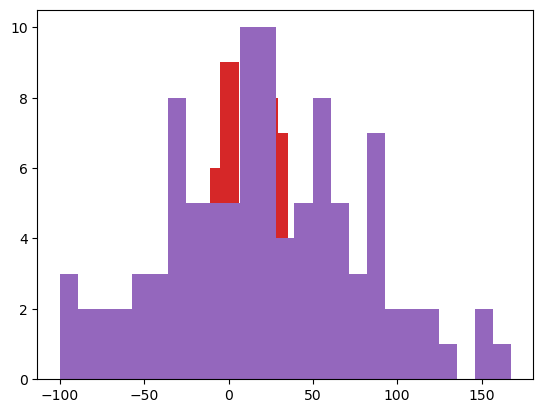

In [175]:
plt.hist(A, bins=25); 
plt.hist(B, bins=25); 
plt.show() # По гистограмме так же видно, что результаты статистически не значимы

##### Задание № 2
Допустим, вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы — водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`

In [460]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]
df = pd.DataFrame({'water' : [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1],
                 'nutri' : [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3],
                 'mineral' :[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1]})
df
# Напишите Ваш код для решения задачи

,water,nutri,mineral
0,1,1,2
1,2,2,1
2,3,4,1
3,4,6,3
4,2,5,2
5,4,6,4
6,2,7,2
7,4,5,4
8,5,4,5
9,2,5,4


In [461]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['water', 'nutri', 'mineral'])
df_melt.columns = ['index', 'treatments', 'value']
df_melt

,index,treatments,value
0,0,water,1
1,1,water,2
2,2,water,3
3,3,water,4
4,4,water,2
5,5,water,4
6,6,water,2
7,7,water,4
8,8,water,5
9,9,water,2


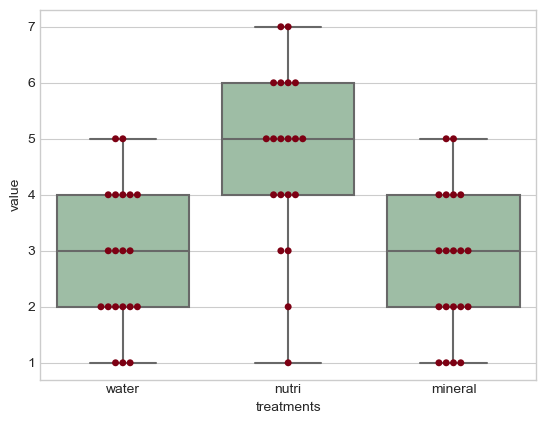

In [462]:
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()  #Можно сделать вывод, что нет статистически значимой разницы межлду водой и минералкой, однако между удобрением и другими способами явно есть

In [463]:
import scipy.stats as stats

fvalue, pvalue = stats.f_oneway(df['water'], df['nutri'], df['mineral'])

print('Статистика=%.3f, p=%.6f' % (fvalue, pvalue))

if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=11.974, p=0.000046
Отклоняем нулевую гипотезу, средние, вероятно, различаются


/Users/alexa_yakovleva/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alexa_yakovleva/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alexa_yakovleva/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

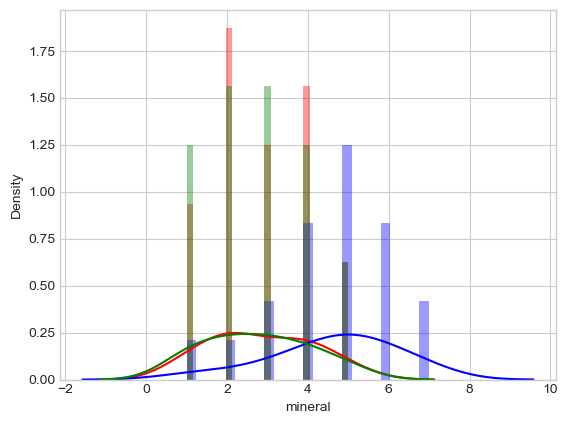

In [464]:
sns.distplot(df['water'], hist = True, bins = 25, color = 'r')
sns.distplot(df['nutri'], hist = True, bins = 25, color = 'blue')
sns.distplot(df['mineral'], hist = True, bins = 25, color = 'green')
plt.show()


### Блок 2
#### Cookie Cats

Cookie Cats — чрезвычайно популярная мобильная игра, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.

По мере прохождения уровней игроки время от времени сталкиваются с воротами, которые заставляют их ждать или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота дают игрокам вынужденный перерыв в игре, что, как мы надеемся, приведёт к увеличению времени, проведённому в игре, и продлению удовольствия от игры.

<b>Но где ставить ворота? </b>
Изначально первые ворота были размещены на уровне `30`. В этом проекте вам предлагается проанализировать A/B-тест, в котором создатели переместили первые ворота в Cookie Cats с `30` уровня на уровень `40`. В частности, вам надо рассмотреть влияние A/B-теста на удержание игроков.

In [465]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

/var/folders/lc/1rfqrt1j091ccy6l5rbbnx0h0000gn/T/ipykernel_14712/974058101.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения A/B-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.
* `version` - был ли игрок помещён в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки?
* `retention_7` - игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

#### Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
    
**Замечание:** приведённых вспомогательных фрагментов кода не хватает для ответа на вопрос. 

Делать выводы необходимо, опираясь на статистические тесты, разобранные в лекции. 

Большим плюсом будет построение визуализиции для подтверждения ваших выводов. Рекомендуем использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и `matplotlib`

In [466]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


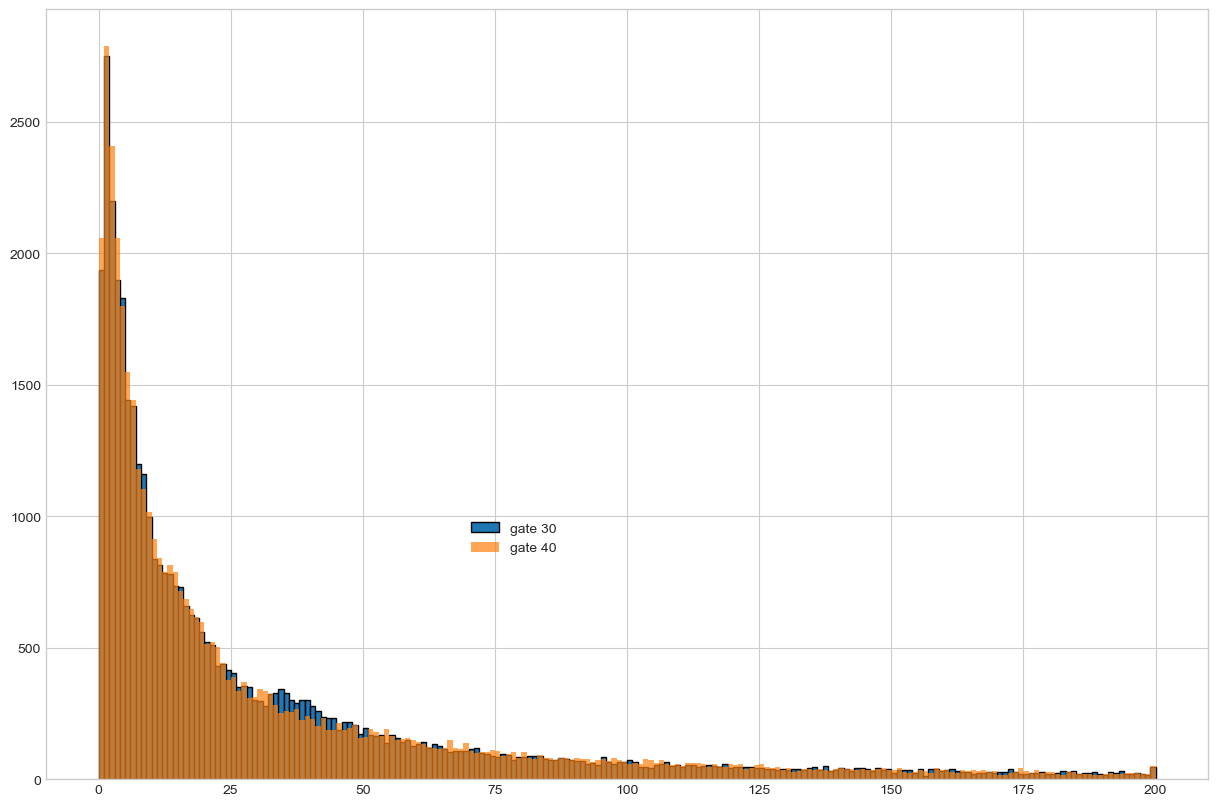

In [467]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

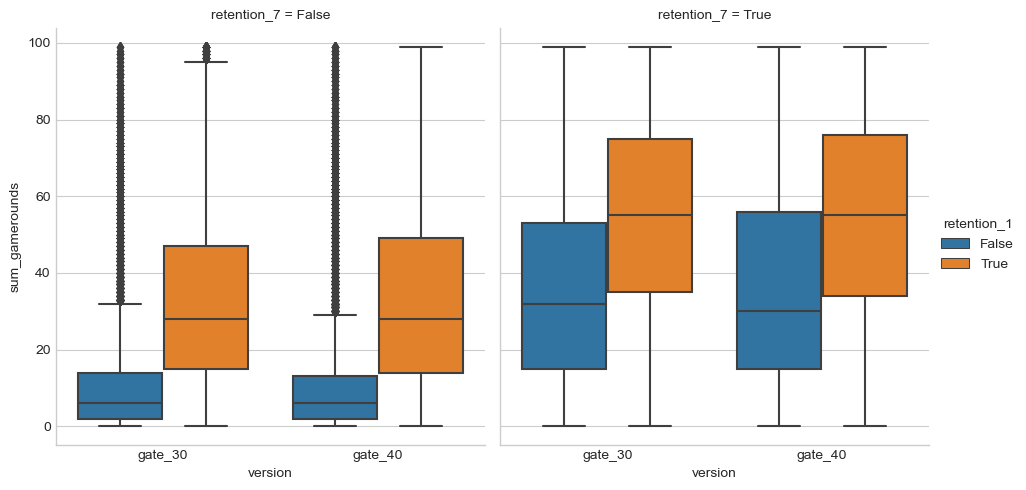

In [468]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


<AxesSubplot:ylabel='Density'>

<Figure size 1500x1000 with 0 Axes>

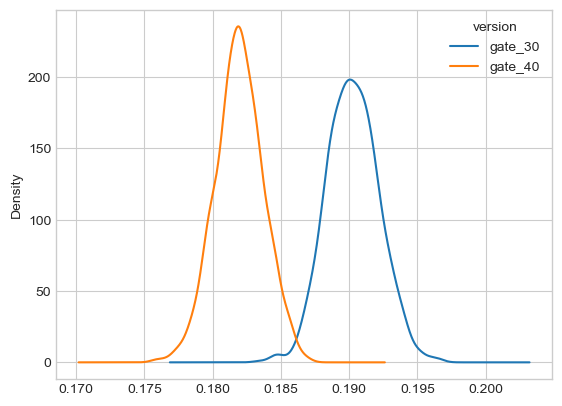

In [469]:
#Если вдруг оказалось сложно, то вот ещё один способ визуализации различий
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density')

<span style="color:red">**ВОТ ТУТ ЯЧЕЙКА НИЖЕ - ЭТО, ПО СУТИ, РЕШЕНИЕ ЗАДАЧИ. УБРАТЬ БЫ ЕЁ ТОГДА**</span>

In [ ]:
from scipy.stats import f_oneway 
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
f, p
#stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
#print('Statistics=%.3f, p=%.3f' % (stat, p))

(0.7939569526814368, 0.3729086824696095)

Ниже, пожалуйста, напишите Ваши выводы на основании решения:

### Блок 3
#### Покемоны и A/B-тестирование

Покемоны — это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.).

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.**

In [183]:
# Откроем датасет

pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head()

/var/folders/lc/1rfqrt1j091ccy6l5rbbnx0h0000gn/T/ipykernel_14712/3650493355.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


**Задание № 1**
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [363]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil




#pokemon['Class'] = pokemon['Class 1'] + ' ' + pokemon['Class 2']
data = pokemon[(pokemon['Class 1'] == 'Grass')|(pokemon['Class 2'] == 'Grass')]
datag = data[['Attack']]
data1 = pokemon[(pokemon['Class 1'] == 'Rock')|(pokemon['Class 2'] == 'Rock')]
datar = data1[['Attack']]
datar





#grass_attack = df[df['Class'].str.contains('Grass')].count()
#rock_attack
#grass_attack


80      80
81      95
82     120
103     45
119     85
120    130
149     40
150     60
151     80
152    115
153    105
154    135
200    100
230     10
237     50
240     55
265     64
266     84
267    134
268    164
323     45
330     70
331     90
332    110
369     55
370     95
377     41
378     81
379     95
380    125
404     90
414    100
453    125
454    165
455     42
456     52
486     80
515    140
528     55
583     75
584    105
585    135
618     65
619     95
625     78
626    108
627    112
628    140
700    129
758     52
759    105
766     89
767    121
768     59
769     77
773     50
795    100
796    160
Name: Attack, dtype: int64

In [354]:
stat, p = stats.ttest_ind(datag, datar)

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')
    

Статистика = -3.61233, p = 0.0004125367
Отклоняем нулевую гипотезу, средние, вероятно, различаются


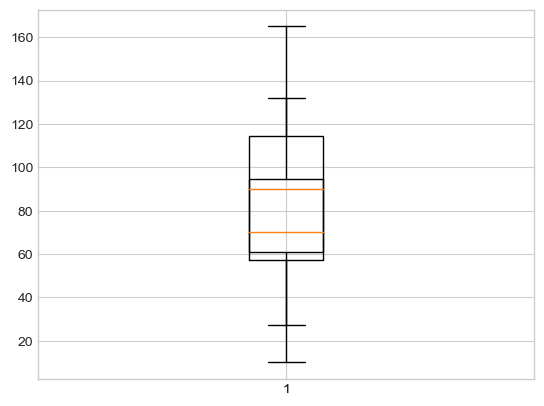

In [384]:
plt.boxplot(datag);
plt.boxplot(datar);

In [370]:
"""По результатам проверки двух выборок мы видим, что покемоны класса 'Rock' сильнее покемонов класса 'Grass'"""

"По результатам проверки двух выборок мы видим, что покемоны класса 'Rock' сильнее покемонов класса 'Grass'"

**Задание № 2**
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`. 

Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [371]:
data = pokemon[(pokemon['Class 1'] == 'Water')|(pokemon['Class 2'] == 'Water')]
dataw = data[['Speed']]
data1 = pokemon[(pokemon['Class 1'] == 'Normal')|(pokemon['Class 2'] == 'Normal')]
datan = data1[['Speed']]
datan

,Speed
20,56
21,71
22,101
23,121
24,72
...,...
735,72
736,106
744,102
764,70


In [375]:
stat, p = stats.ttest_ind(dataw, datan)

print(stat, p)

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')
    

[-2.1520465] [0.03245359]
Отклоняем нулевую гипотезу, средние, вероятно, различаются


(array([ 2.,  8.,  6., 17., 11., 18., 16., 13.,  8.,  3.]),
 array([  5.,  18.,  31.,  44.,  57.,  70.,  83.,  96., 109., 122., 135.]),
 <BarContainer object of 10 artists>)

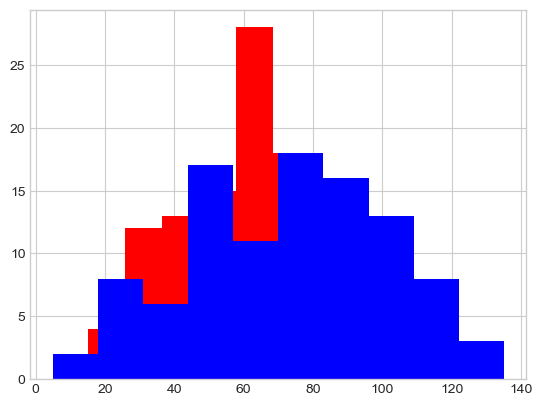

In [382]:
plt.hist(dataw, color = 'r');
plt.hist(datan, color = 'blue') #В среднем скорость покеионов класса 'Normal' выше

**Задание № 3:**
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. 
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам (массив `treathed_pokemon`). 
Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.
    
    
*Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.*

In [387]:
# Покемоны, которые принимали сыворотку
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [403]:
df = pokemon[pokemon['Name'].isin(treathed_pokemon)]
df_speed = df['Speed']
pokemon_speed = pokemon['Speed']
pokemon_speed.mean()
stat, p = stats.ttest_1samp(a=df_speed, popmean=pokemon_speed.mean())
print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, средняя скорость покемонов выборки, вероятно, не отличается от генеральной совокупности ")
else:
    print("Отклоняем нулевую гипотезу, средняя скорость покемонов выборки, вероятно, отличается от генеральной совокупности ")

Статистика = 21.700, p = 0.000
Отклоняем нулевую гипотезу, средняя скорость покемонов выборки, вероятно, отличается от генеральной совокупности 


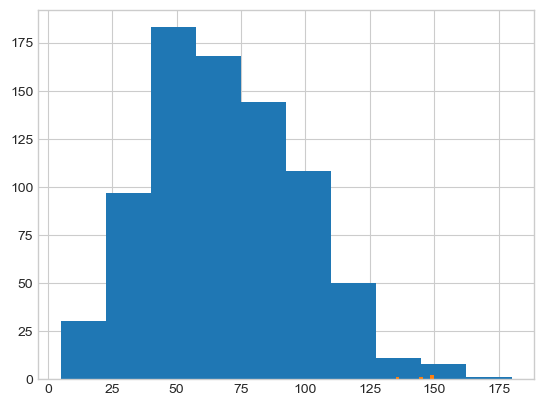

In [406]:
plt.hist(pokemon_speed, bins=10); # Вся популяция.
plt.hist(df_speed, bins=10);  # Выборка

**Задание № 4**
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. 
Оук предложил разобраться в этом Вам. 

Действительно ли сумма характеристик `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров? 

Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [419]:
datal = pokemon [pokemon['Legendary'] == True]
datal
datal_sum = sum((data['HP'], data['Attack'], data ['Defense']))
datal_sum
dataf = pokemon [pokemon['Legendary'] == False]
dataf
dataf_sum = sum((dataf['HP'], dataf['Attack'], dataf ['Defense']))
dataf_sum

0      143
1      185
2      245
3      303
4      134
      ... 
787    307
788    209
789    396
790    105
791    235
Length: 735, dtype: int64

In [420]:
stat, p = stats.ttest_ind(datal_sum, dataf_sum)

print(stat, p)

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')
    

11.591852366462316 7.970942205722087e-29
Отклоняем нулевую гипотезу, средние, вероятно, различаются


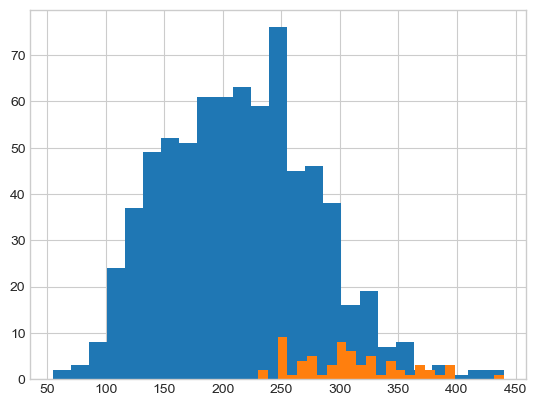

In [422]:
plt.hist(dataf_sum, bins=25); 
plt.hist(datal_sum, bins=25);  #Сумма характеристик легендарных покемонов действительно больше

In [424]:
datal = pokemon [pokemon['Legendary'] == True]
datal
datal_ = ((data['HP']* data['Attack'] *data ['Defense']))
datal_
dataf = pokemon [pokemon['Legendary'] == False]
dataf
dataf_ = ((dataf['HP']* dataf['Attack']* dataf ['Defense']))
dataf_

0       108045
1       234360
2       544480
3       984000
4        87204
        ...   
787    1037000
788     322575
789    2045160
790      42000
791     476000
Length: 735, dtype: int64

In [425]:
stat, p = stats.ttest_ind(datal_, dataf_)

print(stat, p)

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')
    

13.263253408231844 1.992664308842282e-36
Отклоняем нулевую гипотезу, средние, вероятно, различаются


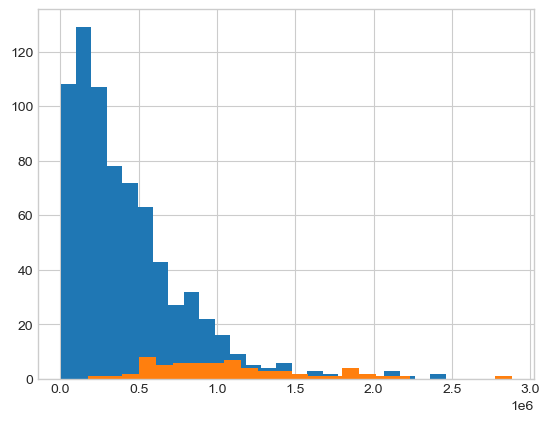

In [426]:
plt.hist(dataf_, bins=25); 
plt.hist(datal_, bins=25);

**Задание № 5**
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса (массив `best_defence_class`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. 

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо. Все та же статистика Вам в помощь! 

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [429]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']

In [436]:
pocr = pokemon[(pokemon['Class 1'] == 'Rock')|(pokemon['Class 2'] == 'Rock')]
pocg = pokemon[(pokemon['Class 1'] == 'Ground')|(pokemon['Class 2'] == 'Ground')]
pocs = pokemon[(pokemon['Class 1'] == 'Steel')|(pokemon['Class 2'] == 'Steel')]
poci = pokemon[(pokemon['Class 1'] == 'Ice')|(pokemon['Class 2'] == 'Ice')]

In [437]:
fvalue, pvalue = stats.f_oneway(pocr['Defense'], pocg['Defense'], pocs['Defense'], poci['Defense'])

print('Статистика=%.3f, p=%.6f' % (fvalue, pvalue))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')
    

Статистика=10.820, p=0.000001
Отклоняем нулевую гипотезу, средние, вероятно, различаются


(array([ 2.,  4.,  8., 11.,  5.,  6.,  0.,  0.,  0.,  2.]),
 array([ 15. ,  31.9,  48.8,  65.7,  82.6,  99.5, 116.4, 133.3, 150.2,
        167.1, 184. ]),
 <BarContainer object of 10 artists>)

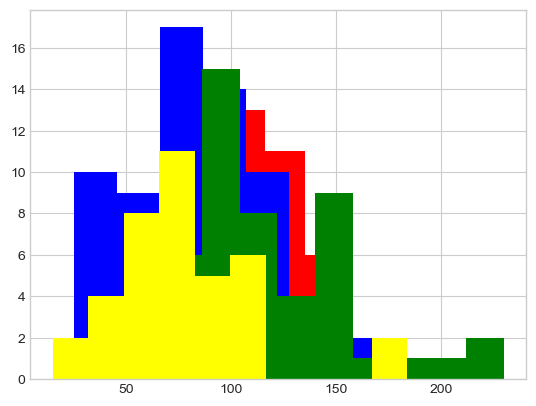

In [446]:
plt.hist(pocr['Defense'], color = 'r');
plt.hist(pocg['Defense'], color = 'blue');
plt.hist(pocs['Defense'], color = 'green');
plt.hist(poci['Defense'], color = 'yellow')

/Users/alexa_yakovleva/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/alexa_yakovleva/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/alexa_yakovleva/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

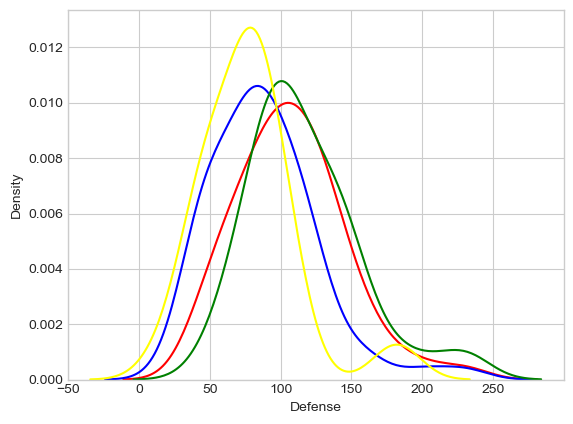

In [448]:
sns.distplot(pocr['Defense'], hist = False, bins = 25, color = 'r')
sns.distplot(pocg['Defense'], hist = False, bins = 25, color = 'blue')
sns.distplot(pocs['Defense'], hist = False, bins = 25, color = 'green')
sns.distplot(poci['Defense'], hist = False, bins = 25, color = 'yellow')
plt.show()
#Можно предположить, что по уровню защиты статистически не отличаются покемоны классов Rock and Steel, покемоны классов Ground and Ice так же не сильно отличаются между собой
